In [1]:
#This project is about read data from dataset, perform k-clustering, plot the result of clustering
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the data from csv file of dataset.
#Encoding separator (;), encoding (cp1252), and  low_memory=False to handle any memory allocation issues.
df = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=";", encoding='cp1252', low_memory=False)


In [3]:
#Handle Missing Value
df.dropna(subset=['square_feet', 'price_display'], inplace=True)

In [4]:
#Removing $ sign from price_display column and replace with empty string
df['price_display'] = df['price_display'].str.replace(r'\$', '', regex=True)
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,"time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0,USD,No,Thumbnail,...,790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,"1577359415,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1,USD,No,Thumbnail,...,425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,"1577017063,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,...,"1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,"1577359410,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,...,925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,"1576667743,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0,USD,No,Thumbnail,...,880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,"1577359401,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4,5,USD,No,Thumbnail,...,"6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,"1575112975,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8,6,USD,No,Thumbnail,...,"25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,"1577360419,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6,USD,No,Thumbnail,...,"11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,"1577360560,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1,USD,No,Thumbnail,...,"4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,"1577362186,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."


In [5]:
# Encode categorical variables
categorical_cols = ['square_feet', 'price_display']
le = LabelEncoder()
for col in categorical_cols:
   df[col] = le.fit_transform(df[col])

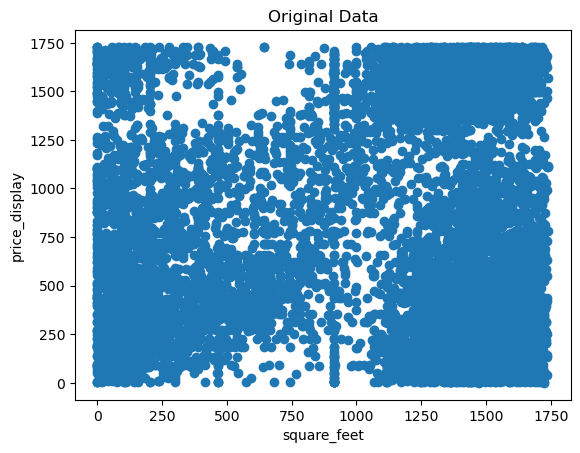

In [6]:
# Plot the original data
column1 = 'square_feet'
column2 = 'price_display'
plt.scatter(df[column1], df[column2])
plt.xlabel(column1)
plt.ylabel(column2)
plt.title('Original Data')
plt.show()

In [7]:
# Perform K-means clustering
X = df[[column1, column2]]

In [8]:
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

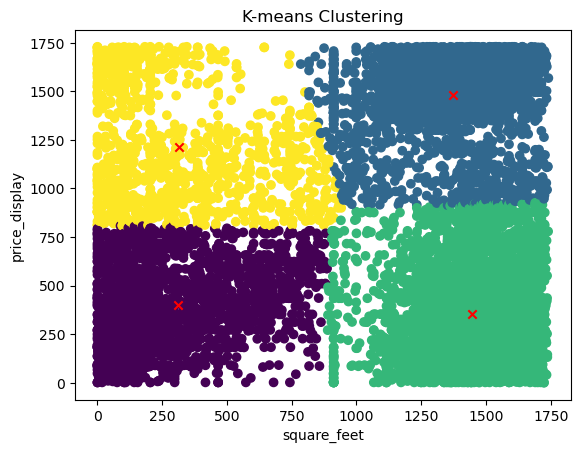

In [9]:
# Plot the clustering results
#Columun1 indicates'square_feet' on the x-axis and column 2 indicates'price_display' on the y-axis.
plt.scatter(df[column1], df[column2], c=labels)
# Plots cluster centroids as red 'x' markers.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel(column1)
plt.ylabel(column2)
plt.title('K-means Clustering')
plt.show()